In [ ]:
import pandas as pd
import numpy as np

import datetime as dt
import glob

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df1 = pd.read_csv('./accidentologie_rennes.csv')
df1.head(5)

,Geo Point,Geo Shape,gml_id,objectid,accident,unit_pv,date,heure,c_jsem,jsem,...,c_catu_8,catu_8,ntu,nbh,nbnh,annee,somme_victimes,somme_blesses,nb_vehicules,etat
0,"48.19525996380506,-1.624960025462693","{""coordinates"": [[-1.624960025462693, 48.19525...",v_accident_corporel_2012_2018.2,2,1111,Gendarmerie Nationale 0015627 00336,2012-01-20T00:00:00+01:00,8:00,5,vendredi,...,0,NaN,0,1,0,2012,1,1,2,Réalisé
1,"48.08103442275426,-1.637577412394238","{""coordinates"": [[-1.637577412394238, 48.08103...",v_accident_corporel_2012_2018.9,9,1300,Sécurité publique 0035238 00489,2012-10-09T00:00:00+02:00,9:30,2,mardi,...,0,NaN,0,0,2,2012,2,2,1,A créer
2,"48.093370042964544,-1.608149999857022","{""coordinates"": [[-1.608149999857022, 48.09337...",v_accident_corporel_2012_2018.22,22,1351,Sécurité publique 0035238 00325,2012-07-01T00:00:00+02:00,18:18,7,dimanche,...,0,NaN,0,0,1,2012,1,1,2,Réalisé
3,"48.14579998626223,-1.686329991224741","{""coordinates"": [[-1.686329991224741, 48.14579...",v_accident_corporel_2012_2018.49,49,1534,Sécurité publique 0035238 00505,2012-10-19T00:00:00+02:00,4:15,5,vendredi,...,0,NaN,0,0,2,2012,2,2,2,Réalisé
4,"48.12681000384165,-1.713710051574262","{""coordinates"": [[-1.713710051574262, 48.12681...",v_accident_corporel_2012_2018.54,54,1539,Sécurité publique 0035238 00592,2012-11-30T00:00:00+01:00,0:45,5,vendredi,...,0,NaN,0,1,0,2012,1,1,1,A créer


In [ ]:
Tahar = df1[['Geo Point','c_cadmin', 'cadmin', 'c_cadmin_2', 'cadmin_2',
       'c_cadmin_3', 'cadmin_3', 'c_cadmin_4', 'cadmin_4', 'c_cadmin_5',
       'cadmin_5', 'c_cadmin_6', 'cadmin_6','heure','somme_victimes','somme_blesses','accident', 'etat']]

mask=((Tahar["c_cadmin"]==1) | (Tahar["c_cadmin_2"]==1) | (Tahar["c_cadmin_3"]==1)| (Tahar["c_cadmin_4"]==1)
      | (Tahar["c_cadmin_5"]==1)| (Tahar["c_cadmin_6"]==1))
velo=Tahar[mask]

velo

,Geo Point,c_cadmin,cadmin,c_cadmin_2,cadmin_2,c_cadmin_3,cadmin_3,c_cadmin_4,cadmin_4,c_cadmin_5,cadmin_5,c_cadmin_6,cadmin_6,heure,somme_victimes,somme_blesses,accident,etat
12,"48.125716270677316,-1.638155831094109",1,bicyclette,1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,17:30,1,1,2296,Réalisé
13,"48.12143082577939,-1.682978702056919",14,"PL seul ( PTAC > 7,5t )",1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,12:50,1,1,2306,Réalisé
16,"48.131296243983165,-1.690318972214135",7,VL,1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,18:30,1,1,2349,A créer
27,"48.075950041750325,-1.638780036973743",1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,16:45,1,1,1340,Réalisé
36,"48.13029999690241,-1.640329999848481",7,VL,1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,18:00,1,1,2284,A créer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,"48.12970629243656,-1.630719408168554",7,VL,1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,14:10,1,1,957,NaN
3695,"48.117162469978545,-1.680844099005818",1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,7:50,1,1,1061,NaN
3696,"48.13062725832346,-1.684471030789167",1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,8:30,2,2,1064,NaN
3702,"48.07362003846794,-1.577040022619646",10,"VU seul ( 1,5 < PTAC =< 3,5t )",1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,10:26,1,0,1308,NaN


In [ ]:
velo.shape

(616, 18)

# <font color='red'>Analyse du nombre des blessés & Victimes </font>

In [ ]:
#Somme des victimes
__velo__ = velo.copy()
x = __velo__.iloc[:,[14,15]].values
np.unique(x)

array([0, 1, 2, 3], dtype=int64)

**_Il est claire que les données des morts ne présente pas une variablité suffisante pour appliquer une technique du ML (Supervisé ou non supervisé)_**

In [ ]:
#Somme des blessés
y = __velo__.iloc[:,[15]].values
np.unique(y)

array([0, 1, 2, 3], dtype=int64)

**_Même remarque pour les données de blessées_**

### <font color='blue'> Visualisation 3D des données des blessés et des victimes </font>

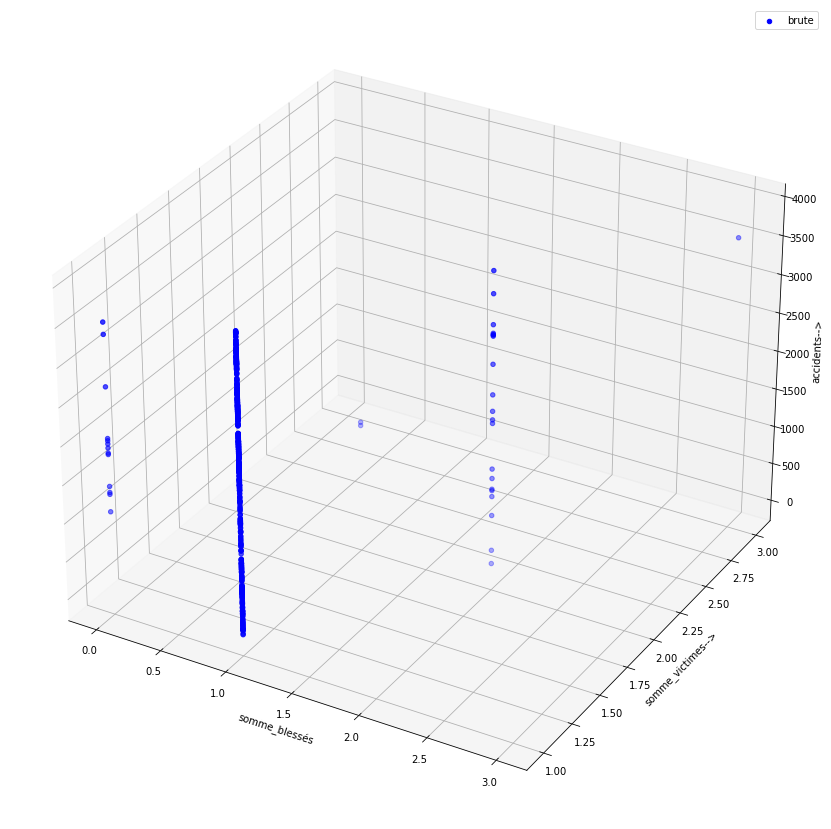

In [ ]:
x = velo['somme_blesses']
y = velo['somme_victimes']
z = velo['accident']

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, color = 'blue', label = "brute")

ax.set_xlabel('somme_blessés')
ax.set_ylabel('somme_victimes-->')
ax.set_zlabel('accidents-->')
ax.legend()
plt.show()

# <font color='red'>Analyse des données : nombre des accidents </font>

In [ ]:
velo_ = velo.copy()
#velo2 = velo_.drop("Geo Point", axis=1, inplace=True)
x = velo_.iloc[:,[16]].values
np.unique(x)

array([   2,    3,   20,   54,   58,   59,   65,   69,   70,   73,   74,
         75,   76,   78,   84,  100,  103,  113,  114,  126,  131,  136,
        143,  150,  156,  160,  171,  173,  176,  194,  199,  208,  210,
        241,  248,  251,  252,  254,  268,  272,  275,  277,  278,  282,
        283,  285,  304,  308,  310,  311,  312,  315,  317,  327,  351,
        359,  360,  362,  374,  404,  409,  415,  420,  422,  429,  435,
        444,  447,  467,  474,  492,  498,  499,  500,  501,  522,  523,
        525,  535,  537,  539,  543,  548,  551,  554,  556,  560,  563,
        566,  569,  571,  575,  581,  583,  587,  590,  593,  597,  599,
        600,  603,  604,  607,  613,  614,  618,  620,  624,  625,  627,
        628,  635,  640,  642,  643,  644,  669,  708,  712,  713,  716,
        729,  731,  734,  746,  747,  752,  759,  761,  766,  772,  776,
        785,  817,  819,  820,  823,  827,  832,  833,  834,  835,  856,
        857,  860,  863,  872,  876,  884,  885,  8

==> **_Ces données présentent une variablité suffisante pour appliquer une technique du ML non supervisé, afin d'intérpreter et déduire les actions à réalisées_**

# <font color='red'>Clustering : nombre des accidents </font>

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


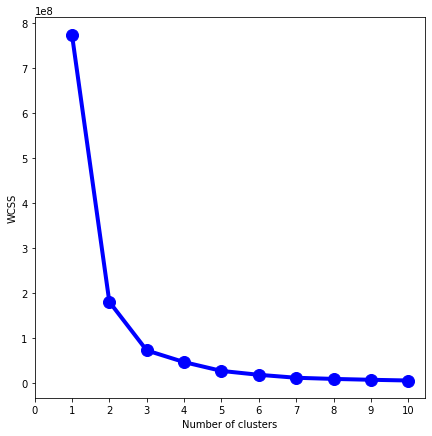

In [ ]:
# find the optimal number of clusters using elbow method

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'blue')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

__nombre de cluster = 3__

In [ ]:
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)
np.unique(y_clusters)

array([0, 1, 2])

In [ ]:
velo[y_clusters ==0]
print('le shape du premier cluster est : ', x[y_clusters == 0].shape)
print('le shape du deuxième cluster est : ', x[y_clusters == 1].shape)
print('le shape du troisième cluster est : ', x[y_clusters == 2].shape)

le shape du premier cluster est :  (208, 1)
le shape du deuxième cluster est :  (202, 1)
le shape du troisième cluster est :  (206, 1)


In [ ]:
print(np.unique(velo[y_clusters ==0]['somme_victimes']))
print(np.unique(velo[y_clusters ==1]['somme_victimes']))
print(np.unique(velo[y_clusters ==2]['somme_victimes']))


[1 2 3]
[1 2]
[1 2]


__==> Pour touts les accidents, il n'ya pas un zéro mort ! Donc le critère de dangérosité minimal sera 1 mort__

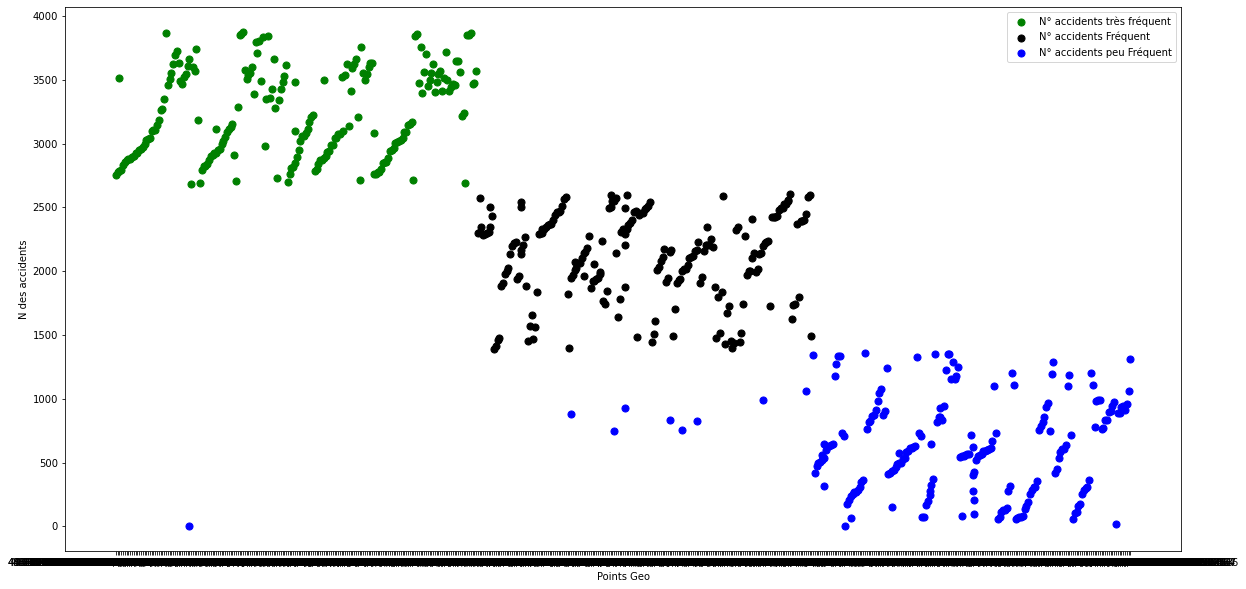

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(velo[y_clusters ==0]['Geo Point'],x[y_clusters == 0],s = 50, c = 'green', label = "N° accidents très fréquent")
plt.scatter(velo[y_clusters ==2]['Geo Point'],x[y_clusters == 2],s = 50, c = 'black', label = "N° accidents Fréquent")
plt.scatter(velo[y_clusters ==1]['Geo Point'],x[y_clusters == 1],s = 50, c = 'blue', label = "N° accidents peu Fréquent")

plt.xlabel("Points Geo")
plt.ylabel("N des accidents")
plt.legend()
plt.show()

# Sous classes basé sur la dangerosité (nombre des morts)

In [ ]:
acc = velo[y_clusters ==0]['accident']
coord = velo[y_clusters ==0]['Geo Point']
vict = velo[y_clusters ==0]['somme_victimes']
bless = velo[y_clusters ==0]['somme_blesses']

acc1 = velo[y_clusters ==1]['accident']
coord1 = velo[y_clusters ==1]['Geo Point']
vict1 = velo[y_clusters ==1]['somme_victimes']

acc2 = velo[y_clusters ==2]['accident']
coord2 = velo[y_clusters ==2]['Geo Point']
vict2 = velo[y_clusters ==2]['somme_victimes']

acc_clust00 =[]
acc_clust01 =[]
acc_clust10 = []
acc_clust11 = []
acc_clust20 = []
acc_clust21 = []

coord_clust00 =[]
coord_clust01 =[]
coord_clust10 =[]
coord_clust11 =[]
coord_clust20 =[]
coord_clust21 =[]
for i,j,k,p in zip(vict,acc, coord, bless):
    if (i>1):
        acc_clust01.append(j)
        coord_clust01.append(k)
    else:
        acc_clust00.append(j)
        coord_clust00.append(k)

for i,j,k in zip(vict1,acc1, coord1):
    if (i>1):
        acc_clust11.append(j)
        coord_clust11.append(k)
    else:
        acc_clust10.append(j)
        coord_clust10.append(k)


for i,j,k in zip(vict2,acc2, coord2):
    if (i>1):
        acc_clust21.append(j)
        coord_clust21.append(k)
    else:
        acc_clust20.append(j)
        coord_clust20.append(k)


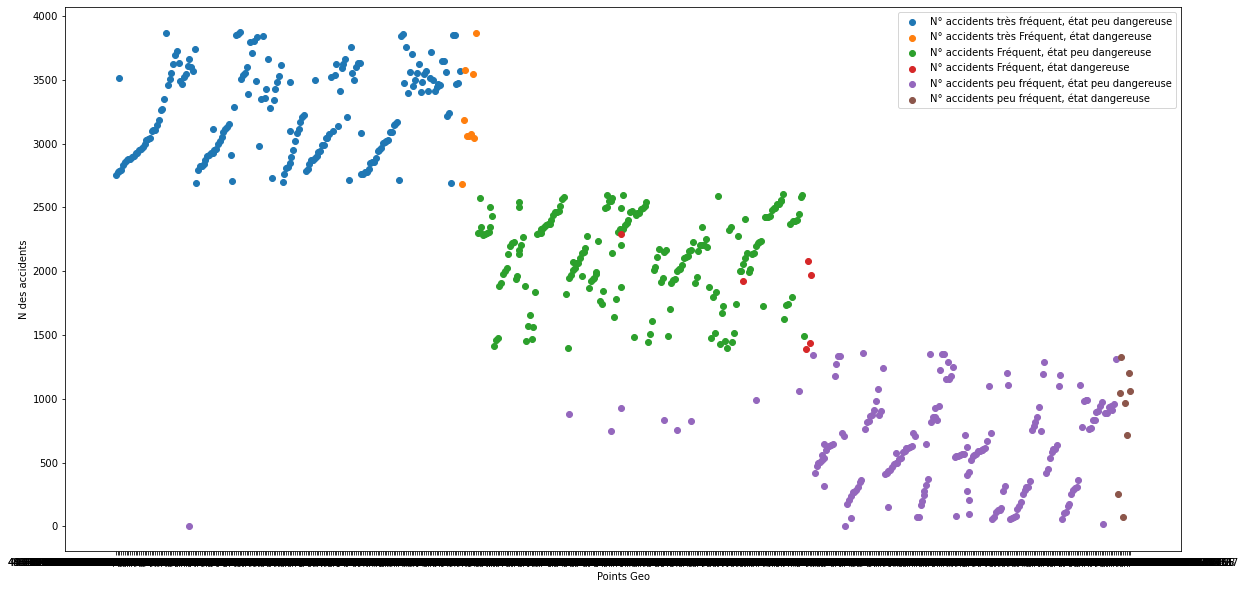

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(coord_clust00, acc_clust00, label = "N° accidents très fréquent, état peu dangereuse")
plt.scatter(coord_clust01, acc_clust01, label = "N° accidents très Fréquent, état dangereuse")
plt.scatter(coord_clust20, acc_clust20, label = "N° accidents Fréquent, état peu dangereuse")
plt.scatter(coord_clust21, acc_clust21, label = "N° accidents Fréquent, état dangereuse")
plt.scatter(coord_clust10, acc_clust10, label = "N° accidents peu fréquent, état peu dangereuse")
plt.scatter(coord_clust11, acc_clust11, label = "N° accidents peu fréquent, état dangereuse")

plt.xlabel("Points Geo")
plt.ylabel("N des accidents")
plt.legend()
plt.show()

### Comparaison avec l'état actuelle d'infrastructure

In [ ]:
k=0
coord_not_cyclable_with_frequent_acc = []
coord_not_cyclable_with_moy_frequent_acc = []
coord_not_cyclable_with_little_frequent_acc = []
for i in velo.iloc[:,0]:
    for j in coord_clust01:
        if i ==j:
            coord = j
            etat = velo.iloc[k,-1]
            k=k+1
            if etat == 'A créer':
                coord_not_cyclable_with_frequent_acc.append(j)


for i in velo.iloc[:,0]:
    for j in coord_clust21:
        if i ==j:
            coord = j
            etat = velo.iloc[k,-1]
            k=k+1
            if etat == 'A créer':
                coord_not_cyclable_with_moy_frequent_acc.append(j)

for i in velo.iloc[:,0]:
    for j in coord_clust11:
        if i ==j:
            coord = j
            etat = velo.iloc[k,-1]
            k=k+1
            if etat == 'A créer':
                coord_not_cyclable_with_little_frequent_acc.append(j)



print('les coordonnées qui présentent un nombre des accidents important, avec des pistes non cyclable', '\n',
      (coord_not_cyclable_with_frequent_acc), '\n', (coord_not_cyclable_with_moy_frequent_acc), '\n',
      (coord_not_cyclable_with_little_frequent_acc))


les coordonnées qui présentent un nombre des accidents important, avec des pistes non cyclable 
 ['48.10444592509733,-1.677324523210986', '48.101718558615055,-1.630073802196482', '48.109858376660334,-1.679173925689499'] 
 ['48.11364865298198,-1.687234157446218', '48.10540072708687,-1.70844710368631', '48.10540072708687,-1.70844710368631', '48.10540072708687,-1.70844710368631', '48.108942487892385,-1.710229107451985'] 
 ['48.13230003196552,-1.63445996648755', '48.13062725832346,-1.684471030789167']


### <font color='red'><u>Maps de ces coordonnées à faire</u></font> !!!

In [ ]:
import pandas as pd
from bokeh.io import output_notebook
output_notebook()
bokeh_width, bokeh_height = 500,400

lat, lon = 48.10444592509733,-1.677324523210986
import os
api_key = os.environ['GOOGLE_API_KEY']

from bokeh.io import show
from bokeh.plotting import gmap
from bokeh.models import GMapOptions
from bokeh.models import ColumnDataSource

def plot(lat, lng, zoom=10, map_type='roadmap'):
    gmap_options = GMapOptions(lat=lat, lng=lng,
                               map_type=map_type, zoom=zoom)
    p = gmap(api_key, gmap_options, title='Rennes',
             width=bokeh_width, height=bokeh_height)
    # definition of the column data source:
    source = ColumnDataSource(df)
    # see how we specify the x and y columns as strings,
    # and how to declare as a source the ColumnDataSource:
    center = p.circle('lon', 'lat', size=4, alpha=0.2,
                      color='yellow', source=source)
    show(p)
    return p

p = plot(lat, lon, map_type='satellite')


Loading BokehJS ...

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "x" value "lon", key "y" value "lat" [renderer: GlyphRenderer(id='1572', ...)]


# <font color='red'>Clustering : nombre des accidents </font>

In [ ]:
velo

,Geo Point,c_cadmin,cadmin,c_cadmin_2,cadmin_2,c_cadmin_3,cadmin_3,c_cadmin_4,cadmin_4,c_cadmin_5,cadmin_5,c_cadmin_6,cadmin_6,heure,somme_victimes,somme_blesses,accident
2,"48.13312750451041,-1.670940278674956",7,VL,1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,08:20,1,1,2205
8,"48.12685190930008,-1.687880463242971",1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,08:20,1,1,2267
12,"48.09130621904447,-1.650894082218981",7,VL,1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,16:35,1,1,1884
18,"48.11390527881266,-1.645807617203991",1,bicyclette,7,VL,0,NaN,0,NaN,0,NaN,0,NaN,14:10,1,1,2753
23,"48.11428594267462,-1.61038683590323",10,"VU seul ( 1,5 < PTAC =< 3,5t )",1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,18:40,1,1,2781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3670,"48.105665117053704,-1.666044869473265",7,VL,1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,20:15,1,1,2164
3676,"48.0876707617501,-1.651043196340976",1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,09:04,1,1,3463
3682,"48.10156960550172,-1.649607255535325",1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,13:58,1,1,3645
3684,"48.11541872415287,-1.713803249672971",7,VL,1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,18:50,1,1,3649


In [ ]:
velo['accidents_pred_2030'] = velo['accident']*2

C:\Users\DELL\AppData\Local\Temp/ipykernel_5488/4009919749.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
new_data = velo[y_clusters ==1]
pred_accident = new_data ['accidents_pred_2030']
coord_accident = new_data['Geo Point']

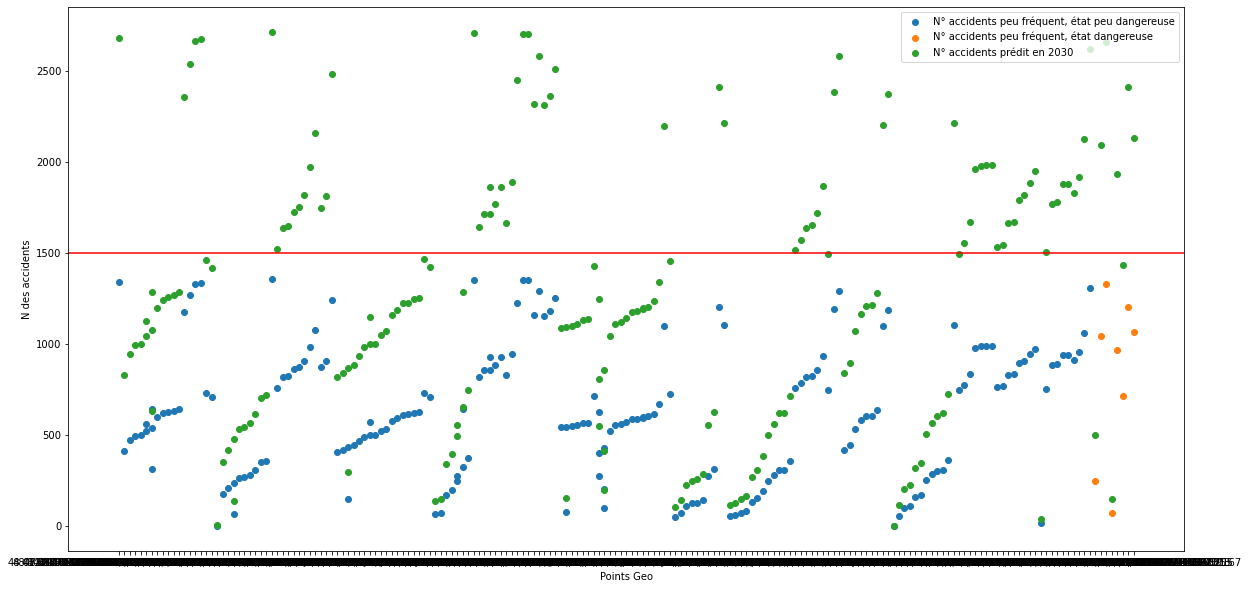

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(coord_clust10, acc_clust10, label = "N° accidents peu fréquent, état peu dangereuse")
plt.scatter(coord_clust11, acc_clust11, label = "N° accidents peu fréquent, état dangereuse")
plt.scatter(coord_accident, pred_accident, label = "N° accidents prédit en 2030")
plt.axhline(y=1500, color = 'r', linestyle = '-')
plt.xlabel("Points Geo")
plt.ylabel("N des accidents")
plt.legend()
plt.show()

In [ ]:
new_pred_acc = []
new_coord_acc = []
for i,j in zip(pred_accident,coord_accident):
    if i >1500:
        new_pred_acc.append(i)
        new_coord_acc.append(j)

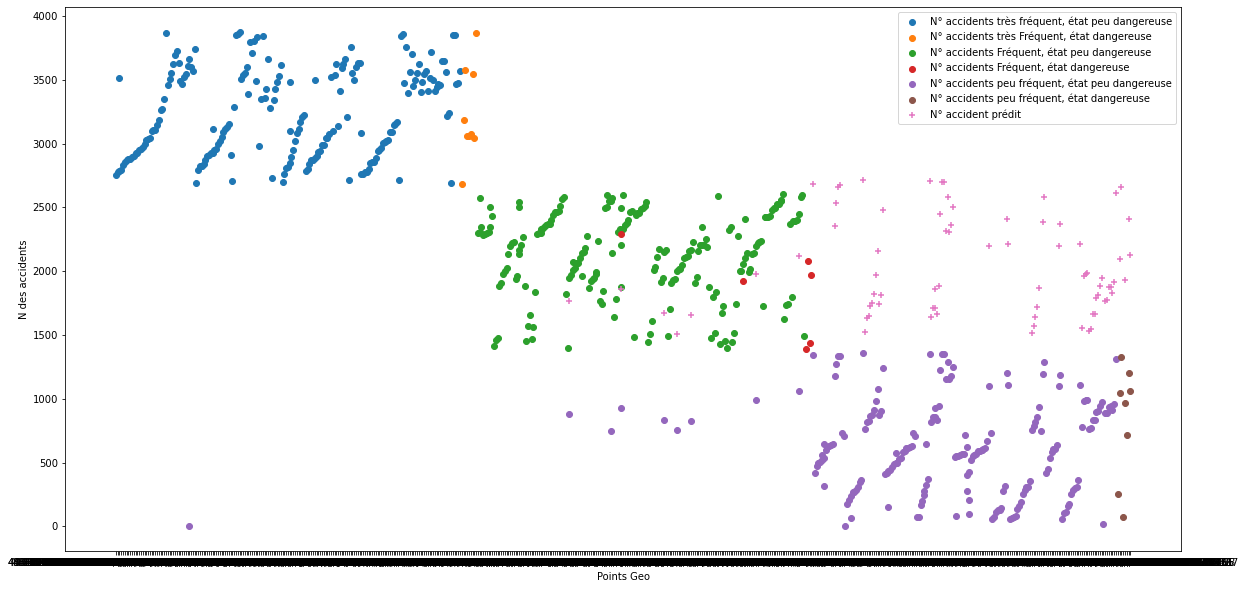

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(coord_clust00, acc_clust00, label = "N° accidents très fréquent, état peu dangereuse")
plt.scatter(coord_clust01, acc_clust01, label = "N° accidents très Fréquent, état dangereuse")
plt.scatter(coord_clust20, acc_clust20, label = "N° accidents Fréquent, état peu dangereuse")
plt.scatter(coord_clust21, acc_clust21, label = "N° accidents Fréquent, état dangereuse")
plt.scatter(coord_clust10, acc_clust10, label = "N° accidents peu fréquent, état peu dangereuse")
plt.scatter(coord_clust11, acc_clust11, label = "N° accidents peu fréquent, état dangereuse")

plt.scatter(new_coord_acc, new_pred_acc, label ='N° accident prédit', marker = '+')
plt.xlabel("Points Geo")
plt.ylabel("N des accidents")
plt.legend()
plt.show()

__==> D'ici 2030 le nombre des accidents avec la forte utilisation des éco-mobilité va augmenter pour qu'il apparatient au 2 ème cluster où <font color='red'><u>*Nombre des accidents est fréquents*</u></font> d'où la nécessite d'intervenir avant__